In [69]:
import requests
import os
import json
import numpy as np

# questions
- playoff id: important ?
- 

In [70]:
def retrieve_game_data(game_id):
    
    filename = f"{game_id}.json"
    data_dir = "../raw_data"
    if os.path.exists(f"{data_dir}/{filename}"):
        with open(f"{data_dir}/{filename}", 'r') as file:
            print("using cached data")
            return json.load(file)

    response = requests.get(f"https://api-web.nhle.com/v1/gamecenter/{game_id}/play-by-play")

    if response.status_code == 200:
        data = response.json()
        
        with open(f"{data_dir}/{filename}", 'w') as file:
            json.dump(data, file)
        
        return data
    else:
        print(f"Failed to retrieve data: {response.status_code}")
        return None
retrieve_game_data(2020020001)

using cached data


{'id': 2020020001,
 'season': 20202021,
 'gameType': 2,
 'limitedScoring': False,
 'gameDate': '2021-01-13',
 'venue': {'default': 'Wells Fargo Center'},
 'venueLocation': {'default': 'Philadelphia', 'fr': 'Philadelphie'},
 'startTimeUTC': '2021-01-13T22:30:00Z',
 'easternUTCOffset': '-05:00',
 'venueUTCOffset': '-05:00',
 'tvBroadcasts': [{'id': 241,
   'market': 'N',
   'countryCode': 'US',
   'network': 'NBCSN',
   'sequenceNumber': 13},
  {'id': 284,
   'market': 'N',
   'countryCode': 'CA',
   'network': 'SN1',
   'sequenceNumber': 102}],
 'gameState': 'OFF',
 'gameScheduleState': 'OK',
 'periodDescriptor': {'number': 3,
  'periodType': 'REG',
  'maxRegulationPeriods': 3},
 'awayTeam': {'id': 5,
  'name': {'default': 'Penguins'},
  'abbrev': 'PIT',
  'score': 3,
  'sog': 34,
  'logo': 'https://assets.nhle.com/logos/nhl/svg/PIT_light.svg',
  'placeName': {'default': 'Pittsburgh'},
  'placeNameWithPreposition': {'default': 'Pittsburgh',
   'fr': 'de Pittsburgh'}},
 'homeTeam': {'id'

In [71]:
# https://gitlab.com/dword4/nhlapi/-/blob/master/stats-api.md
# https://en.wikipedia.org/wiki/List_of_NHL_seasons

REGULAR_SEASON = "02"
PLAYOFFS = "03"

'''
1353 for seasons with 32 teams (2022 - Present)
1271 for seasons with 31 teams (2017 - 2020)
1230 for seasons with 30 team
For playoff games, the 2nd digit of the specific number gives the round of the playoffs, the 3rd digit specifies the matchup, and the 4th digit specifies the game (out of 7).
'''
game_number_per_year = {
    "2017": "1271", # 2016-2017
    "2018": "1271",
    "2019": "1271",
    "2020": "1271",
    "2021": "1353",
    "2022": "1353",
    "2023": "1353" # 2023-2024
    }


In [72]:
game_number_per_year["2017"]

'1271'

In [73]:
range(1, int(game_number_per_year["2017"]) + 1)

range(1, 1272)

In [74]:
# 2017 regular season
for game_number in range(1, int(game_number_per_year["2017"]) + 1):
    game_id = f"2017{REGULAR_SEASON}{game_number:04d}"
    retrieve_game_data(game_id)

using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cached data
using cach

In [76]:
# # 2017 playoffs
# for game_number in range(1, int(game_number_per_year["2017"]) + 1):
#     game_id = f"2017{PLAYOFFS}{game_number:04d}"
#     retrieve_game_data(game_id)

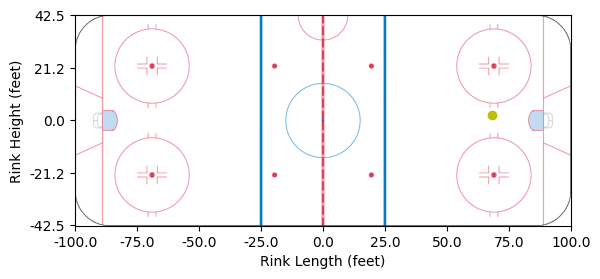

In [78]:
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt


# Load the image
image_path = '../../figures/nhl_rink.png'
image = Image.open(image_path)

    
def plot_coords_on_image(rink_coord_x, rink_coord_y, image, debug_origin = False):
    
    # Get dimensions
    image_length, image_height = image.size
    rink_length=200
    rink_height=85

    def feet_to_pixels(rink_coord_x, rink_coord_y):

        image_coords_x = rink_coord_x / rink_length * image_length
        image_coords_y = rink_coord_y / rink_height * image_height

        return image_coords_x, image_coords_y

    # # Example coordinates in feet
    # rink_coord_x, rink_coord_y = 68, 2

    # Convert to pixel coordinates
    image_coords_x, image_coords_y = feet_to_pixels(rink_coord_x, rink_coord_y)

    # Display the image with the point

    _, ax = plt.subplots()
    ax.imshow(image)

    ax.invert_yaxis()

    if debug_origin:
        origin_x, origin_y = 0, 0
        adjusted_origin_x = origin_x + image_length / 2
        adjusted_origin_y = origin_y + image_height / 2
        ax.plot(origin_x, origin_y, 'bo') 
        ax.plot(adjusted_origin_x, adjusted_origin_y, 'go')

    # Adjust coordinates to center origin
    adjusted_coords_x = image_coords_x + image_length / 2
    adjusted_coords_y = image_coords_y + image_height / 2


    # Plot the point with the adjusted coordinates
    ax.plot(adjusted_coords_x, adjusted_coords_y, 'yo')

    # Generate axis labels
    step_size_x = rink_length / 8  # in feet
    step_size_y = rink_height / 4  # in feet

    num_x = int((rink_length / step_size_x) + 1)
    num_y = int((rink_height / step_size_y) + 1)

    xtick_labels = np.linspace(-rink_length / 2, rink_length / 2, num=num_x)
    ytick_labels = np.linspace(-rink_height / 2, rink_height / 2, num=num_y)

    ax.set_xticks(np.linspace(0, image_length, num=num_x))
    ax.set_yticks(np.linspace(0, image_height, num=num_y))

    ax.set_xticklabels([f'{label:.1f}' for label in xtick_labels])
    ax.set_yticklabels([f'{label:.1f}' for label in ytick_labels])
    ax.set_xlabel('Rink Length (feet)')
    ax.set_ylabel('Rink Height (feet)')

    # Invert the y-axis to match the image coordinate system

    plt.show()

plot_coords_on_image(68, 2, image, debug_origin=False)

IntSlider(value=513, description='Game ID:', max=1271, min=1)

id 2017020513
date 2017-12-18
Venue Location:  Philadelphia
Home Team:  Flyers
Away Team: Kings


IntSlider(value=2, description='Event ID:', max=274)

53
missed-shot
59
-34


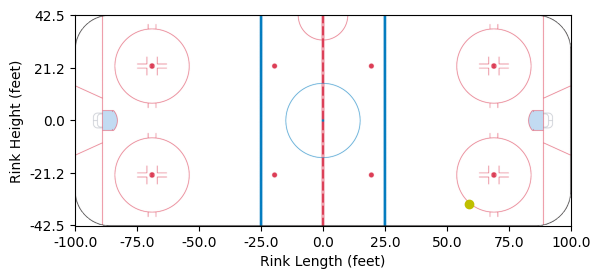

In [80]:
import ipywidgets as widgets
from pprint import pprint
from IPython.display import clear_output
season = "2017"
game_number = int(game_number_per_year[season])
game_id_slider = widgets.IntSlider(min=1, max=game_number, step=1, description='Game ID:')
display(game_id_slider)
# print(event_id.value)
# game_id = f"{season}{REGULAR_SEASON}{event_id.value:04d}"
# data = retrieve_game_data(game_id)
# print(data)

def print_game_info(game_data):
    print("id" , game_data["id"])
    print("date" , game_data["gameDate"])
    print("Venue Location: ", game_data["venueLocation"]["default"])
    print("Home Team: ", game_data["homeTeam"]["name"]["default"])
    print("Away Team:", game_data["awayTeam"]["name"]["default"])


def on_game_id_change(change):
    game_id = f"{season}{REGULAR_SEASON}{change['new']:04d}"
    data = retrieve_game_data(game_id)
    clear_output(wait=True)
    display(game_id_slider)  # Re-display the IntSlider widget
    print_game_info(data)

    events = data["plays"]
    event_slider = widgets.IntSlider(min=0, max=len(events), step=1, description='Event ID:')
    display(event_slider)

    def on_event_id_change(change):
        event = events[change['new']]
        clear_output(wait=True)

        display(game_id_slider)
        print_game_info(data)

        display(event_slider)

        print(event["eventId"])
        print(event["typeDescKey"])
        if "details" in event:
            if "xCoord" in event["details"] and "yCoord" in event["details"]:
                print(event["details"]["xCoord"])
                print(event["details"]["yCoord"])
                plot_coords_on_image(event["details"]["xCoord"], event["details"]["yCoord"], image, debug_origin=False)

    event_slider.observe(on_event_id_change, names='value')



game_id_slider.observe(on_game_id_change, names='value')